Download and uncompress dataset:  http://mng.bz/0tIo

In [1]:
!pwd
!ls ./data/aclImdb
!echo "files in train/pos" && ls ./data/aclImdb/train/pos | wc -l
!echo "files in train/neg" && ls ./data/aclImdb/train/neg | wc -l
!echo "files in test/pos" && ls ./data/aclImdb/test/pos  | wc -l
!echo "files in test/neg" && ls ./data/aclImdb/test/neg  | wc -l

/home/marchelo/MarcheloBragagnini/100DaysOfMLCode
test  train
files in train/pos
12500
files in train/neg
12500
files in test/pos
12500
files in test/neg
12500


In [2]:
import os
imdb_dir = './data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
print(texts[69])
print(labels[69])

God this film was just so boring apart from the music which i really loved, i mean what was the point in actually making this movie please anyone who reads this review do not watch this film, it is a waste of time.<br /><br />Emraan can act but was really pathetic In this film, i am actually ashamed to be one of his fans especially in this movie, it was just really bad.<br /><br />Celina is just another pretty face with no lack of talent what so ever, she can't act at all, and there was no point of her being in this film, as for the other girl Radha she was okay i guess but could have done better.<br /><br />what a waste of time. please buy the great music and don't watch this movie.
0


In [3]:
import pandas as pd
pds_data = pd.DataFrame({'raw_text':texts})

pds_data.head()

,raw_text
0,"I haven't seen this movie in a while, so I'm a..."
1,"Ladies and Gentlemen,please don't get fooled b..."
2,Suggesting nothing less than a movie-length ve...
3,I do not fail to recognize Haneke's above-aver...
4,For me this is a story that starts with some f...


In [4]:
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

def clean_text(text, remove_stopwords=False, stem_words=False):
    
    # Remove punctuation
    text = text.translate(string.punctuation)
    
    # Convert words to lower case and split them
    text = text.lower().split()

    if(remove_stopwords == True):
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    # Optionally, shorten words to their stems
    if(stem_words == True):
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)

pds_data['proc_text'] = pds_data['raw_text'].map(lambda x:clean_text(x, remove_stopwords=True, stem_words=True))

In [7]:
pds_data.head()

,raw_text,proc_text
0,"I haven't seen this movie in a while, so I'm a...",seen movi while i am afraid cannot specif deta...
1,"Ladies and Gentlemen,please don't get fooled b...",ladi gentlemen pleas get fool stanley kubrick ...
2,Suggesting nothing less than a movie-length ve...,suggest noth less movi - length version 1970s ...
3,I do not fail to recognize Haneke's above-aver...,fail recogn hanek abov - averag film - make sk...
4,For me this is a story that starts with some f...,stori start funni joke regard frank fanatasi t...


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 20000
max_length = 50

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(pds_data['proc_text'])

sequences = tokenizer.texts_to_sequences(pds_data['proc_text'])
data = pad_sequences(sequences, max_length)

labels = np.asarray(labels)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [9]:
print(data[69])
print(labels[69])

[  693   463   197   143  1230   735  2578  2349  1055   114   252   125
  2211  7803  3138  1297    92    42   351  4477   336     1     1  1671
  2427     4    56  1999   498   171     2   455    32  8118 10127    64
  1196    11  2079  3296  3338    51  2480   685   293  1029     1     1
  1219   165]
1


In [10]:
word_index = tokenizer.word_index

In [9]:
#import chakin
#chakin.search(lang='English')
#chakin.download(number=12, save_dir='./data')

In [11]:
glove_dir = './data/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Preparing the GloVe word-embedding matrix

In [12]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

/home/marchelo/anaconda3/envs/ml.tools/lib/python3.5/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_lay..., outputs=sigmoid.0)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 50)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 50, 100)           2000000   
_________________________________________________________________
dropout_layer (Dropout)      (None, 50, 100)           0         
_________________________________________________________________
relu_layer (Conv1D)          (None, 46, 64)            32064     
_________________________________________________________________
maxpool_layer (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
biGRU (Bidirectional)        (None, 128)               49536     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

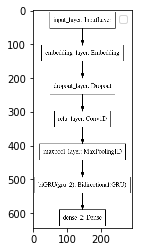

In [14]:
from keras.models import Model
from keras.layers import Flatten, Dense, Input, Embedding, Dropout, Conv1D, Bidirectional, MaxPooling1D, GRU
from keras.utils import plot_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

input_l = Input(shape=(max_length,), dtype='int32', name='input_layer')
embedding_l = Embedding(max_words, embedding_dim, 
                        weights = [embedding_matrix], 
                        trainable = True,
                        input_length=max_length,
                        name="embedding_layer")(input_l)
dropout_l = Dropout(0.2, name="dropout_layer")(embedding_l)
conv1d_l = Conv1D(64, 5, activation='relu', name="relu_layer")(dropout_l)
maxpoo_l = MaxPooling1D(pool_size=4, name="maxpool_layer")(conv1d_l)
bi_gru = Bidirectional(GRU(64), name='biGRU')(maxpoo_l)
output_l = Dense(1, activation='sigmoid')(bi_gru)

model_cnnText = Model(inputs=input_l, output=output_l)

print(model_cnnText.summary())

plot_model(model_cnnText, to_file='imag_CNN-BiGRU-GloVe-IMDB.png')
image = mpimg.imread('./imag_CNN-BiGRU-GloVe-IMDB.png')
plt.imshow(image)
#plt.autoscale(enable=True, axis=u'both')
plt.legend("CNN + BiGRU + GloVe.png")
plt.show()


In [15]:
model_cnnText.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_cnnText = model_cnnText.fit(data, labels, epochs=10, 
                    batch_size=128, validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 242us/step - loss: 0.7011 - acc: 0.4945 - val_loss: 0.6954 - val_acc: 0.5092
Epoch 2/10
20000/20000 [==============================] - 4s 213us/step - loss: 0.6877 - acc: 0.5401 - val_loss: 0.6962 - val_acc: 0.5076
Epoch 3/10
20000/20000 [==============================] - 4s 199us/step - loss: 0.6616 - acc: 0.6040 - val_loss: 0.7140 - val_acc: 0.5044
Epoch 4/10
20000/20000 [==============================] - 4s 186us/step - loss: 0.5856 - acc: 0.6879 - val_loss: 0.7687 - val_acc: 0.4900
Epoch 5/10
20000/20000 [==============================] - 3s 169us/step - loss: 0.4662 - acc: 0.7749 - val_loss: 0.9307 - val_acc: 0.5032
Epoch 6/10
20000/20000 [==============================] - 3s 171us/step - loss: 0.3591 - acc: 0.8355 - val_loss: 1.0156 - val_acc: 0.4888
Epoch 7/10
20000/20000 [==============================] - 4s 180us/step - loss: 0.2666 - acc: 0.8866 - val_loss: 1.1710 - v

In [16]:
test_dir = os.path.join(imdb_dir, 'test')

labels_test = []
texts_test = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts_test.append(f.read())
            f.close()
            if label_type == 'neg':
                labels_test.append(0)
            else:
                labels_test.append(1)

pds_data_test = pd.DataFrame({'raw_text':texts_test})
pds_data_test['proc_text'] = pds_data_test['raw_text'].map(lambda x:clean_text(x, remove_stopwords=True, stem_words=True))                
                
sequences_test = tokenizer.texts_to_sequences(pds_data_test['proc_text'])

x_test = pad_sequences(sequences_test, maxlen=max_length)
y_test = np.asarray(labels_test)



In [17]:
print(x_test.shape)
print(y_test.shape)

model_cnnText.evaluate(x_test, y_test)

(25000, 50)
(25000,)
25000/25000 [==============================] - 3s 104us/step


[1.5968573263168335, 0.49528]

In [20]:
from sklearn.manifold import TSNE

## Visualize words in two dimensions 
conv_tsne_embds = TSNE(n_components=2).fit_transform(conv_embds)

In [21]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

#Get word list
word_list = []
for word, i in tokenizer.word_index.items():
    word_list.append(word)

## Plotting function
def plot_words(data, start, stop, step):
    trace = go.Scatter(
        x = data[start:stop:step,0], 
        y = data[start:stop:step, 1],
        mode = 'markers',
        text= word_list[start:stop:step]
    )
    layout = dict(title= 't-SNE 1 vs t-SNE 2',
                  yaxis = dict(title='t-SNE 2'),
                  xaxis = dict(title='t-SNE 1'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)
    
plot_words(conv_tsne_embds, 0, 2000, 1)    

### References
- https://www.kaggle.com/jeremiahharmsen/tensorflow-hub-for-text-classification
- https://github.com/grananqvist/reinforcement-learning-super-mario-A3C
- https://github.com/diux-dev/imagenet18
- http://cs231n.github.io/neural-networks-case-study/
- https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-notebook-avito
- https://www.kaggle.com/lystdo/lstm-with-word2vec-embeddings
- https://medium.com/@sabber/classifying-yelp-review-comments-using-cnn-lstm-and-visualize-word-embeddings-part-2-ca137a42a97d
- https://www.kaggle.com/lystdo/lstm-with-word2vec-embeddings